In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
%matplotlib inline

In [5]:
df_equip = pd.read_csv('russia_losses_equipment.csv', parse_dates = ['date'])
df_pers = pd.read_csv('russia_losses_personnel.csv', parse_dates = ['date'])

df_equip.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [6]:
df_pers.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


# Data Cleaning

In [7]:
#Counting total of null cells
df_equip.isna().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

In [8]:
df_pers.isna().sum()

date          0
day           0
personnel     0
personnel*    0
POW           0
dtype: int64

In [9]:
df_equip[['special equipment']]=df_equip[['special equipment']].fillna(0)
df_equip['mobile SRBM system']=df_equip['mobile SRBM system'].fillna(0)

In [10]:
df_equip.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0.0,0.0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,0.0,0.0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,0.0,0.0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0.0,0.0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0.0,0.0


In [11]:
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61 non-null     datetime64[ns]
 1   day                    61 non-null     int64         
 2   aircraft               61 non-null     int64         
 3   helicopter             61 non-null     int64         
 4   tank                   61 non-null     int64         
 5   APC                    61 non-null     int64         
 6   field artillery        61 non-null     int64         
 7   MRL                    61 non-null     int64         
 8   military auto          61 non-null     int64         
 9   fuel tank              61 non-null     int64         
 10  drone                  61 non-null     int64         
 11  naval ship             61 non-null     int64         
 12  anti-aircraft warfare  61 non-null     int64         
 13  special

In [12]:
df_pers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        61 non-null     datetime64[ns]
 1   day         61 non-null     int64         
 2   personnel   61 non-null     int64         
 3   personnel*  61 non-null     object        
 4   POW         61 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.5+ KB


In [13]:
df_equip.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,32.000000,110.491803,110.032787,542.606557,1566.819672,255.131148,86.934426,1005.540984,68.885246,70.409836,5.196721,44.868852,15.245902,2.065574
std,17.752934,52.230139,41.621296,222.595019,462.154286,115.730070,37.210155,450.206566,7.587486,63.997494,2.386208,20.092681,11.366113,1.998907
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,17.000000,58.000000,83.000000,362.000000,1205.000000,135.000000,62.000000,585.000000,60.000000,7.000000,3.000000,33.000000,0.000000,0.000000
50%,32.000000,121.000000,127.000000,582.000000,1664.000000,294.000000,93.000000,1144.000000,73.000000,56.000000,7.000000,52.000000,21.000000,4.000000
75%,47.000000,154.000000,137.000000,725.000000,1923.000000,347.000000,111.000000,1387.000000,76.000000,119.000000,7.000000,55.000000,25.000000,4.000000
max,62.000000,184.000000,154.000000,918.000000,2308.000000,416.000000,149.000000,1643.000000,76.000000,205.000000,8.000000,69.000000,31.000000,4.000000


In [14]:
#Change columns names

names = {
    'day':'day',
    'aircraft':'aircraft',
    'tank':'tank',
    'APC':'APC',
    'field artillery':'field_artillery',
    'MRL':'MRL',
    'military auto': 'military_auto',
    'fuel tank':'fuel_tank',
    'drone':'drone',
    'naval ship':'naval_ship',
    'anti-aircraft warfare':'aa_warfare',
    'special equipment':'special_equipment',
    'mobile SRBM system':'SRBM'
}

df_equip.rename(columns = names, inplace = True)

In [15]:
df_equip.set_index('date', inplace = True)
df_pers.set_index('date', inplace = True)

In [16]:
#Change all columns for integers values

df_equip['special_equipment'] = df_equip['special_equipment'].astype(int)
df_equip['SRBM'] = df_equip['SRBM'].astype(int)

In [17]:
df_equip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2022-02-25 to 2022-04-26
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   day                61 non-null     int64
 1   aircraft           61 non-null     int64
 2   helicopter         61 non-null     int64
 3   tank               61 non-null     int64
 4   APC                61 non-null     int64
 5   field_artillery    61 non-null     int64
 6   MRL                61 non-null     int64
 7   military_auto      61 non-null     int64
 8   fuel_tank          61 non-null     int64
 9   drone              61 non-null     int64
 10  naval_ship         61 non-null     int64
 11  aa_warfare         61 non-null     int64
 12  special_equipment  61 non-null     int32
 13  SRBM               61 non-null     int32
dtypes: int32(2), int64(12)
memory usage: 6.7 KB


# Analysis

In [18]:
#Total Losts per equip

print('Total equipment lost: \n')
print('Aircraft:', df_equip['aircraft'].max())
print('Helicopter:', df_equip['helicopter'].max())
print('Tank:',  df_equip['tank'].max())
print('APC:',  df_equip['APC'].max())
print('Field Artillery:',  df_equip['field_artillery'].max())
print('MRL:',  df_equip['MRL'].max())
print('Military Auto:',  df_equip['military_auto'].max())
print('Fuel Tank:',  df_equip['fuel_tank'].max())
print('Drone:',  df_equip['drone'].max())
print('Navel Ship lost:',  df_equip['naval_ship'].max())
print('AA Warfare lost:',  df_equip['aa_warfare'].max())
print('Special Equip lost:',  df_equip['special_equipment'].max())
print('SRBM lost:',  df_equip['SRBM'].max())

Total equipment lost: 

Aircraft: 184
Helicopter: 154
Tank: 918
APC: 2308
Field Artillery: 416
MRL: 149
Military Auto: 1643
Fuel Tank: 76
Drone: 205
Navel Ship lost: 8
AA Warfare lost: 69
Special Equip lost: 31
SRBM lost: 4


In [19]:
#Total Deaths

print('Total deaths: ', df_pers['personnel'].max())

Total deaths:  22100


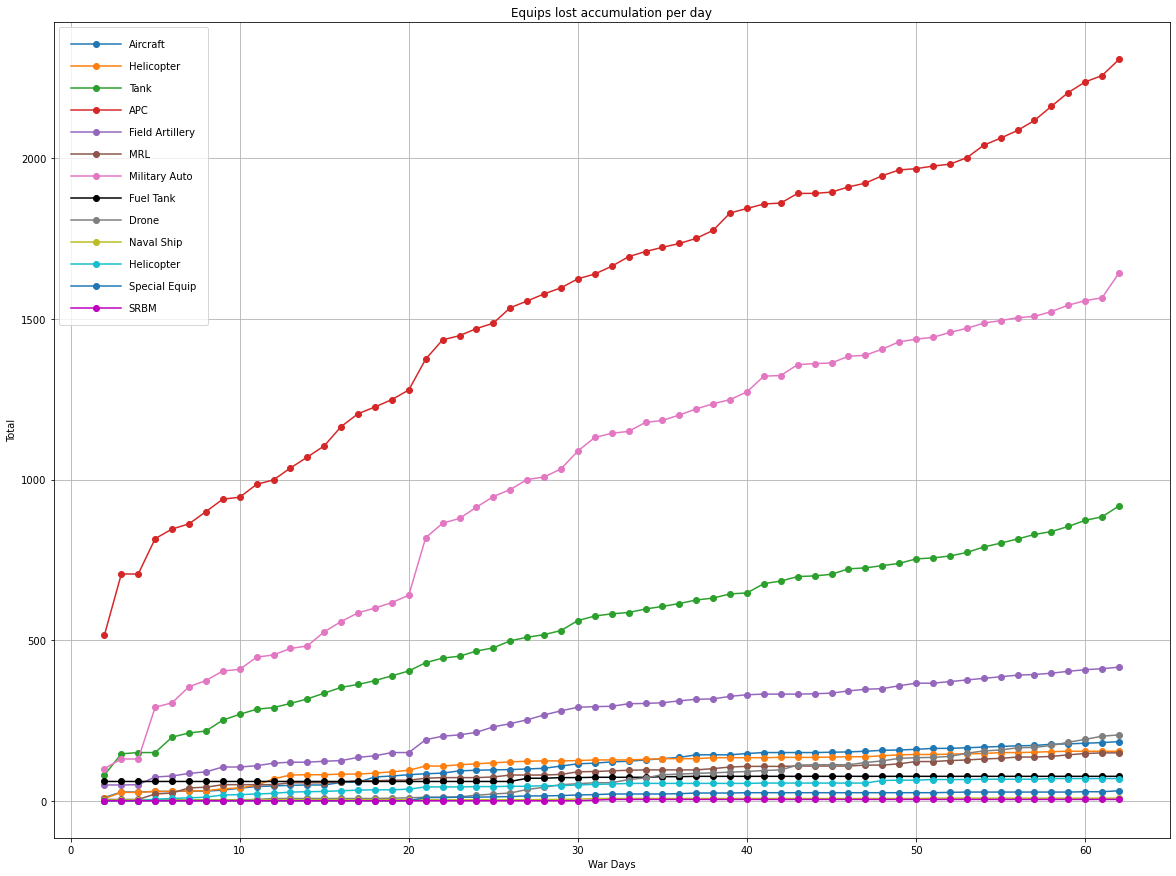

In [20]:
#equips lost accumulation per day

plt.figure(figsize=(20, 15))
plt.plot(df_equip['day'], df_equip['aircraft'], marker = 'o', label = 'Aircraft')
plt.plot(df_equip['day'], df_equip['helicopter'], marker = 'o',label = 'Helicopter')
plt.plot(df_equip['day'], df_equip['tank'], marker = 'o',label = 'Tank')
plt.plot(df_equip['day'], df_equip['APC'], marker = 'o', label = 'APC')
plt.plot(df_equip['day'], df_equip['field_artillery'], marker = 'o', label = 'Field Artillery')
plt.plot(df_equip['day'], df_equip['MRL'], marker = 'o', label = 'MRL')
plt.plot(df_equip['day'], df_equip['military_auto'], marker = 'o', label = 'Military Auto')
plt.plot(df_equip['day'], df_equip['fuel_tank'], marker = 'o', color = 'k', label = 'Fuel Tank')
plt.plot(df_equip['day'], df_equip['drone'], marker = 'o', label = 'Drone')
plt.plot(df_equip['day'], df_equip['naval_ship'], marker = 'o', label = 'Naval Ship')
plt.plot(df_equip['day'], df_equip['aa_warfare'], marker = 'o', label = 'Helicopter')
plt.plot(df_equip['day'], df_equip['special_equipment'], marker = 'o', label = 'Special Equip')
plt.plot(df_equip['day'], df_equip['SRBM'], marker = 'o', color ='m', label = 'SRBM')
plt.legend(loc = 'upper left',  handlelength=5, borderpad=1.2, labelspacing=1.2)
plt.xlabel('War Days')
plt.ylabel('Total')
plt.title('Equips lost accumulation per day')
plt.grid()
plt.show()

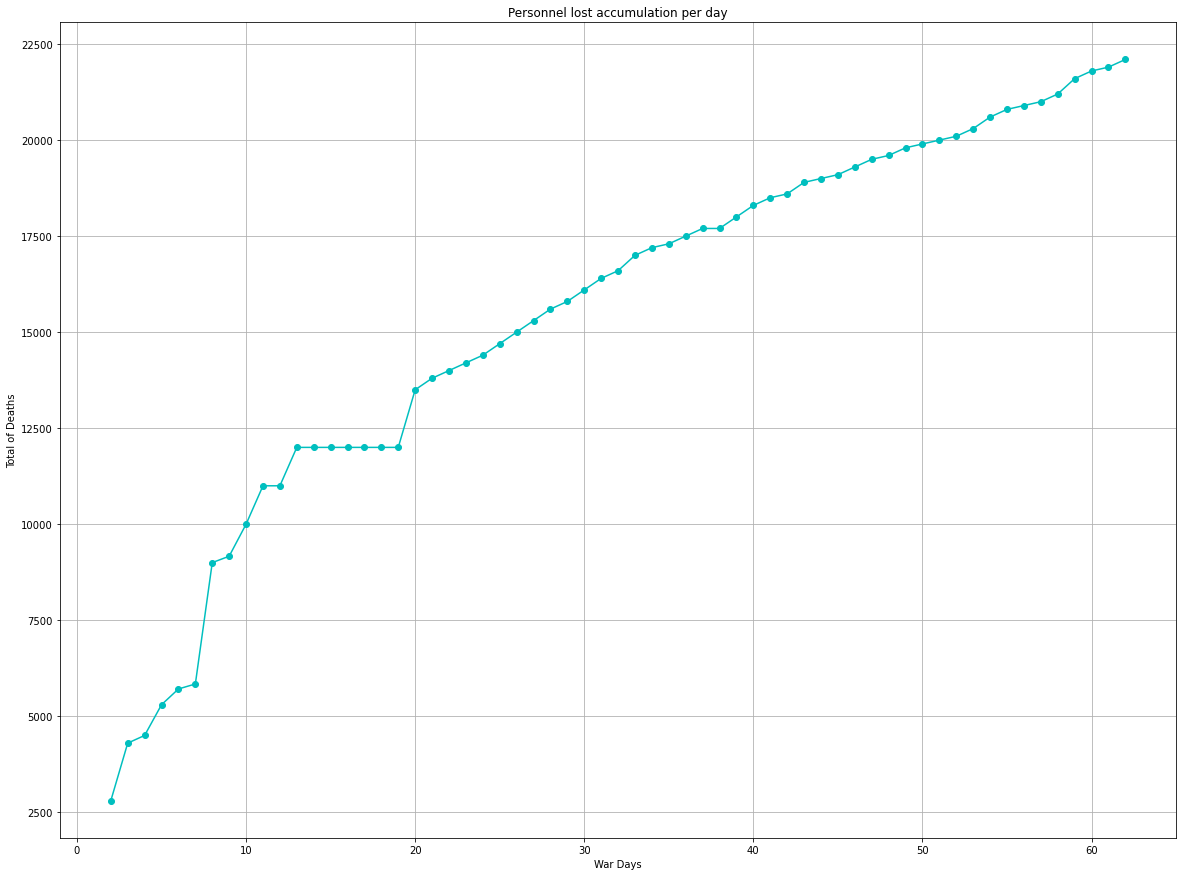

In [21]:
#Total Deaths per day

plt.figure(figsize=(20,15))
plt.plot(df_pers['day'], df_pers['personnel'], marker = 'o', color = 'c')
plt.xlabel('War Days')
plt.ylabel('Total of Deaths')
plt.title('Personnel lost accumulation per day')
plt.grid()
plt.show()

## Simple Linear Regression Model

#### As we can see from the distribution, we have a linear relationship between the number of days and the total number of deaths, so we can adjust a linear regression model to predict the number of deaths in the following days of war (the accuracy and precision will increase with the increase in the number of war days and consequent increase in sample space of our problem).

f(x) = ax + b


In [22]:
x = np.array(df_equip['day'].tail(40)).reshape((-1,1))
y = np.array(df_pers['personnel'].tail(40))

linear_model = LinearRegression().fit(x, y)
r_sq = linear_model.score(x, y)

In [23]:
a = linear_model.coef_
b = linear_model.intercept_

print('coefficient of determination:', r_sq)
print('intercept:', b)
print('slope:', a) 

coefficient of determination: 0.9888986035868871
intercept: 10316.200750469045
slope: [192.14821764]


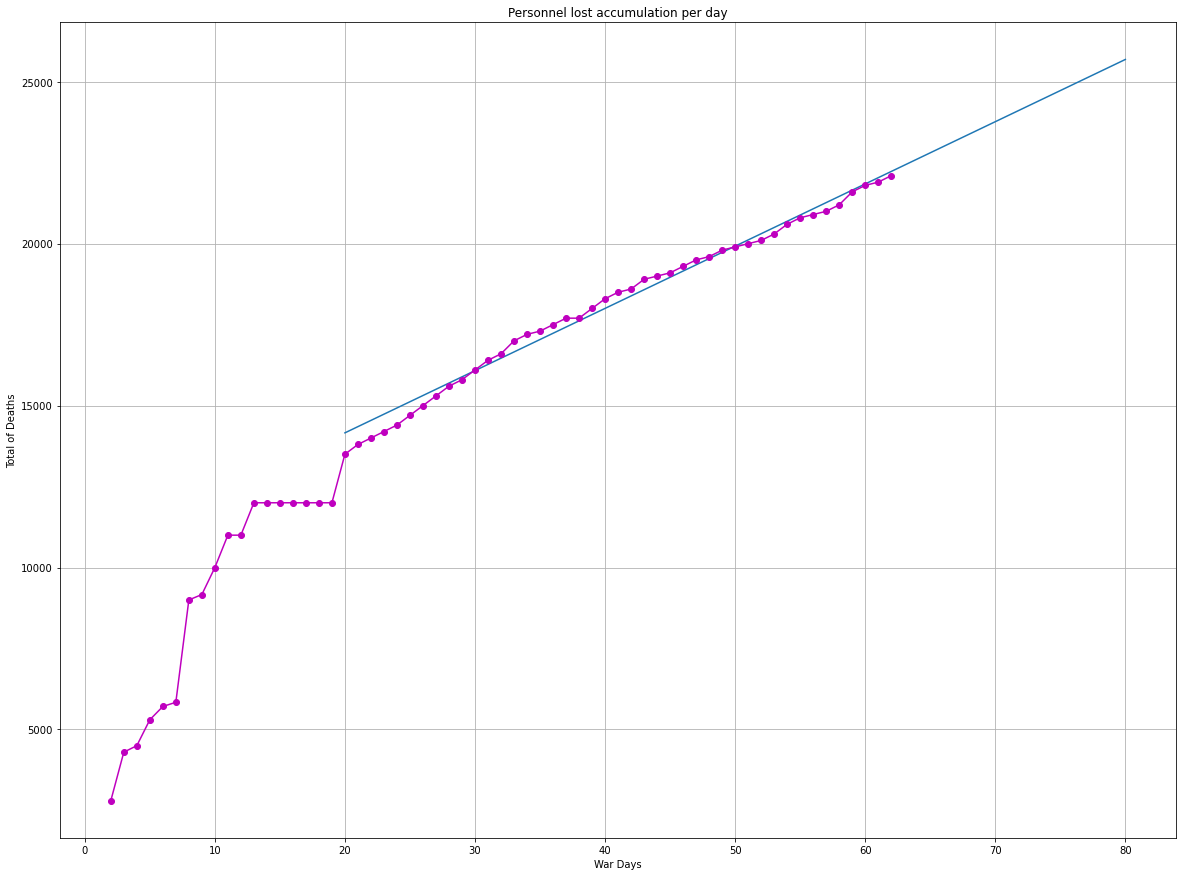

In [24]:
xfit = np.linspace(20, 80, 1000)
yfit = linear_model.predict(xfit[:, np.newaxis])
plt.figure(figsize=(20,15))
plt.plot(xfit, yfit)
plt.plot(df_pers['day'], df_pers['personnel'], marker = 'o', color = 'm')
plt.xlabel('War Days')
plt.ylabel('Total of Deaths')
plt.title('Personnel lost accumulation per day')
plt.grid()
plt.show()

In [25]:
def predict_deaths(d):
    return (d*a + b).astype(int)

#testing prediciton for 100 days of war
print(predict_deaths(100).astype(int))

[29531]


### Studying Pearson Correlation